<a href="https://colab.research.google.com/github/S-loaiza-UAO/Deep-Learning/blob/main/Santiago_Loaiza_Taller_final_M%C3%B3dulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller final del Módulo 2
##Procesamiento de Datos Secuenciales con Deep Learning

##Punto #1:

Realice un prototipo de aplicación en colab con la API del modelo GPT-3 liberado por Open AI (https://openai.com/) (https://beta.openai.com/)  Algunas instrucciones de uso en el siguiente video: https://www.youtube.com/watch?v=C1eOiOkD_8A  (La mejor INTELIGENCIA ARTIFICIAL Generadora de TEXTO (y la puedes USAR) | GPT-3)

[API reference from OpenAI](https://platform.openai.com/docs/api-reference)

[openai_chatgpt_chatbot](https://github.com/futurexskill/projects/tree/main/openai_chatgpt_chatbot)

In [ ]:
!pip install openai==0.28

In [ ]:
!pip uninstall openai

In [1]:
!pip install openai==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade openai

In [2]:
from openai import OpenAI

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key="sk-proj-TZw1zRTtRAemZUEQGf0LT3BlbkFJn6IPIUNeobPSLnOZhXWS",
)

In [3]:
import os
import openai
import pandas as pd
import shutil

In [ ]:
# Define la ruta a la carpeta de validación
dir = "/content/Deep-Learning"

# Elimina la carpeta de validación (y todo su contenido)
shutil.rmtree(dir)

In [4]:
!git clone https://github.com/S-loaiza-UAO/Deep-Learning
%cd Deep-Learning

Cloning into 'Deep-Learning'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 80 (delta 9), reused 3 (delta 3), pack-reused 61
Receiving objects: 100% (80/80), 6.92 MiB | 12.75 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/Deep-Learning


In [32]:
#openai.api_key = os.getenv("sk-proj-TZw1zRTtRAemZUEQGf0LT3BlbkFJn6IPIUNeobPSLnOZhXWS")
#client = os.getenv("sk-proj-TZw1zRTtRAemZUEQGf0LT3BlbkFJn6IPIUNeobPSLnOZhXWS")

####Probando ChatGPT 3.5 como chatbot

In [5]:
def display_chat_history(messages):
    for message in messages:
        print(f"{message['role'].capitalize()}: {message['content']}")

In [62]:
def get_assistant_response(messages):
    r = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": m["role"], "content": m["content"]} for m in messages],

    )
    response = r.choices[0].message.content
    return response

In [7]:
messages = [{"role": "assistant", "content": "How can I help?"}]

In [8]:
while True:
    display_chat_history(messages)

    user_input = input("User: ")
    messages.append({"role": "user", "content": user_input})

    assistant_response = get_assistant_response(messages)
    messages.append({"role": "assistant", "content": assistant_response})

Assistant: How can I help?
User: hola chat
Assistant: How can I help?
User: hola chat
Assistant: ¡Hola! ¿En qué puedo ayudarte hoy?
User: estoy practicando PLM y redes recurrentes
Assistant: How can I help?
User: hola chat
Assistant: ¡Hola! ¿En qué puedo ayudarte hoy?
User: estoy practicando PLM y redes recurrentes
Assistant: ¡Qué interesante! ¿Necesitas ayuda con algún concepto específico de PLM o redes recurrentes? Estoy aquí para ayudarte.
User: por ahora si, y muuuucha ayuda
Assistant: How can I help?
User: hola chat
Assistant: ¡Hola! ¿En qué puedo ayudarte hoy?
User: estoy practicando PLM y redes recurrentes
Assistant: ¡Qué interesante! ¿Necesitas ayuda con algún concepto específico de PLM o redes recurrentes? Estoy aquí para ayudarte.
User: por ahora si, y muuuucha ayuda
Assistant: ¡Claro que sí! Estoy aquí para ayudarte en todo lo que necesites. ¿En qué parte específica de PLM y redes recurrentes te gustaría que te ayude? ¡Cuéntame más!


KeyboardInterrupt: Interrupted by user

####Aplicando ChatGPT 3.5 como clasificador

In [9]:
#Debido a errores previos es necesario encontrar la codificacion del dataset para beneficiar la lectura del archivo.
import chardet

with open("dataset-CalheirosMoroRita-2017.csv", "rb") as f:
    data = f.read()
    encoding = chardet.detect(data)["encoding"]

print(f"Codificación detectada: {encoding}")


Codificación detectada: Windows-1252


In [10]:
#Lectura del dataset con codificacion.
with open("dataset-CalheirosMoroRita-2017.csv", "r", encoding=encoding) as f:
    data = f.read()

# Dividir el string en comentarios individuales ya que el dataset esta compuesto por comentario cada linea.
comentarios = data.split("\n")

# Crear un DataFrame vacío
comentarios_df = pd.DataFrame(columns=["comentario"])

# Agregar cada comentario al DataFrame
for comentario in comentarios:
    comentarios_df = comentarios_df._append({"comentario": comentario}, ignore_index=True)

# Guardar el DataFrame como un CSV organizado
comentarios_df.to_csv("comentarios_organizados.csv", index=False)


In [11]:
# Cargar el dataset de comentarios
comentarios_df = pd.read_csv("comentarios_organizados.csv")

In [12]:
print(comentarios_df)

                                            comentario
0                                               Review
1     Everything from the weather, staff, food, pro...
2    "The hotel it is fantastic built by the sea, l...
3           We full enjoyed the place, and facilities.
4    Thanks for the ""cidreira"" and ""madalenas"" ...
..                                                 ...
648  "    SPA is excellent. I worked only with one ...
649  I am impressed by the quality of the place and...
650  We received great support for my small son wit...
651  I will be happy to do an event or come back to...
652                                                NaN

[653 rows x 1 columns]


In [79]:
# Seleccionar 10 comentarios aleatorios
comentarios_aleatorios = comentarios_df.sample(10)

In [80]:
print(comentarios_aleatorios)

                                            comentario
509      Returning next week for another three nights.
645  "As you know we have just returned home after ...
198  Unfortunately, the same can not be said of you...
311       A magical place where we were treated wit...
57    Please tell Leonardo to keep experimenting wi...
209     " Very healthy and cutting edge restaurant    
2    "The hotel it is fantastic built by the sea, l...
38   "     Dear Areas do Seixo team: we have no wor...
607       Thank you for the most wonderful weekend....
630   Delicious breakfast.    Thank you for the nic...


In [81]:
# Clasificar cada comentario usando el chatbot GPT-3.5
clasificaciones = []
for comentario in comentarios_aleatorios["comentario"]:

  # Generar la solicitud para el chatbot
  user_input = f"Clasifica el comentario entre 0 y 5, siendo 0 un comentario negativo y 5 un comentario muy positivo, los comentarios que no se consideran evaluables asigna un 2:\n\n{comentario}"
  #print(user_input)
  messages.append({"role": "user", "content": user_input})

  r = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": m["role"], "content": m["content"]} for m in messages],
        )
  response = r.choices[0].message.content
  #print(response)

  # Almacenar la clasificación
  clasificaciones.append(response)

# Agregar la clasificación a cada comentario en el DataFrame
comentarios_aleatorios["clasificacion"] = clasificaciones

In [82]:
# Imprimir los comentarios con sus clasificaciones
comentarios_aleatorios

,comentario,clasificacion
509,Returning next week for another three nights.,"De acuerdo con el texto proporcionado, que ind..."
645,"""As you know we have just returned home after ...","En una escala del 0 al 5, donde 0 es un coment..."
198,"Unfortunately, the same can not be said of you...","No puedo evaluar el comentario proporcionado, ..."
311,A magical place where we were treated wit...,"En una escala del 0 al 5, este comentario serí..."
57,Please tell Leonardo to keep experimenting wi...,"En una escala del 0 al 5, este comentario serí..."
209,""" Very healthy and cutting edge restaurant",Basándome en la naturaleza positiva y alentado...
2,"""The hotel it is fantastic built by the sea, l...","Este comentario sería clasificado como 4, ya q..."
38,""" Dear Areas do Seixo team: we have no wor...","En una escala del 0 al 5, clasificaría este co..."
607,Thank you for the most wonderful weekend....,Este comentario sería clasificado con un 5 en ...
630,Delicious breakfast. Thank you for the nic...,"En una escala del 0 al 5, donde 0 es negativo ..."


##Punto #2

Seleccione un data set para una aplicación de PLN y realice  un notebook en colab con lo siguiente:
* Explique el problema o la aplicación que se va a resolver
* Entrene un modelo basado en Deep Learning para el problema seleccionado. Este modelo puede ser entrenado desde cero o usando un modelo pre-entrenado haciendo uso de transfer learning o fine tuning (puede usar la librería Hugging Face)
* Valide el funcionamiento del modelo obtenido


[OpinRank Review Dataset](https://archive.ics.uci.edu/dataset/205/opinrank+review+dataset)

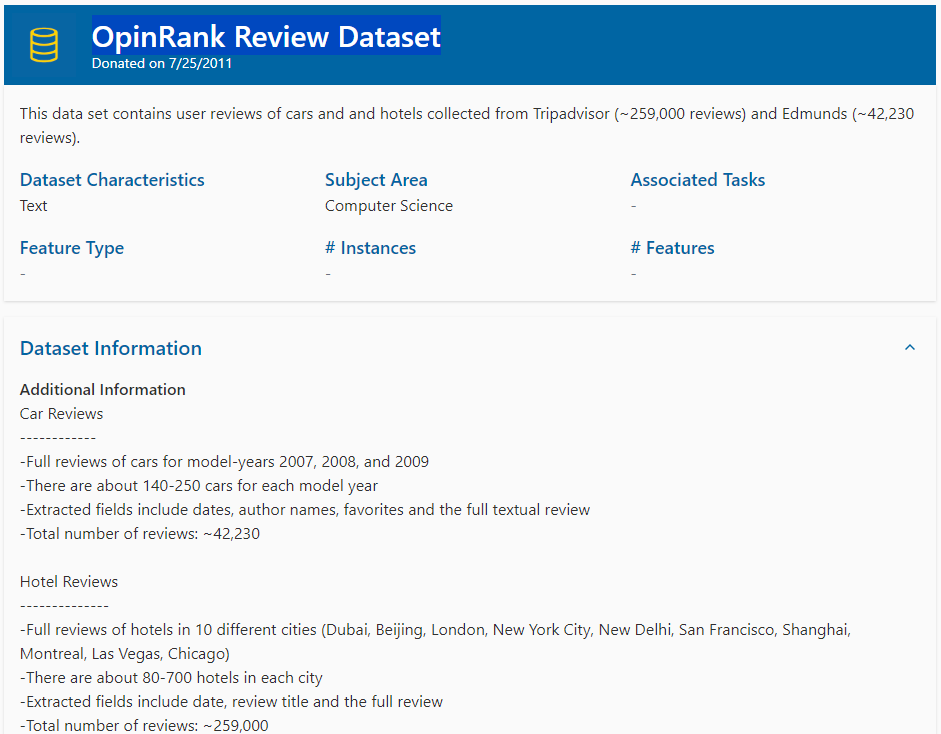

In [ ]:
!pip install huggingface_hub
#You already have it if you installed transformers or datasets


In [ ]:
# Transformers installation
! pip install transformers datasets
# To install from source instead of the last release, comment the command above and uncomment the following one.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 32.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="holistic-ai/fact-opinion-classification-albert-v2")

config.json:   0%|          | 0.00/889 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

In [ ]:
classifier("ugly place")

[{'label': 'NEGATIVE', 'score': 0.9998101592063904}]

In [ ]:
pipe("i love you")

[{'label': 'LABEL_1', 'score': 0.9774722456932068}]

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="meta-llama/Meta-Llama-3-8B")

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3-8B.
401 Client Error. (Request ID: Root=1-6638350c-2a817dd8662afe990165a8c8;5d1bea1c-da83-4383-97ef-72d0930ce7ea)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3-8B/resolve/main/config.json.
Access to model meta-llama/Meta-Llama-3-8B is restricted. You must be authenticated to access it.